# (test) Regress percentage of test takers in the paper

We will use points obtained from the Article to create a model that predicts your chance of sitting for the SHSAT based on your Math test score (apparently done after the SHSAT).

*the test scores are measured in standard deviations*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import expit, logit
from scipy.stats import norm
from sklearn.linear_model import HuberRegressor, LinearRegression

probit = lambda x: norm.ppf(x)
probit_inv = lambda x: norm.cdf(x)

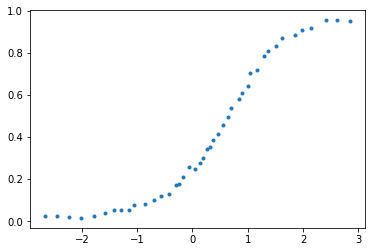

In [2]:
points = pd.read_csv('../data/keep/percent-applicants-by-math-grade.csv', header=None)

xs = points[0]
ys = points[1] / 100.0

xs_input = xs.to_frame()
ys_logit = logit(ys)
ys_probit = probit(ys)

plt.plot(xs, ys, '.')

In [9]:
model1 = LinearRegression()
model2 = HuberRegressor(epsilon=1.0)

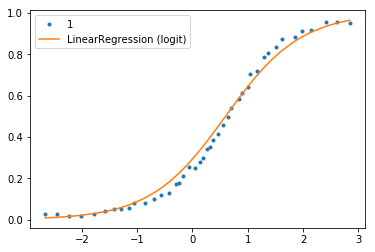

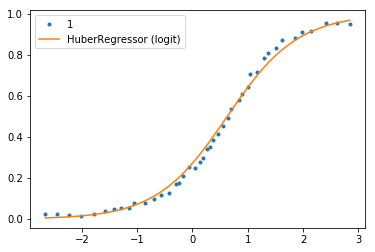

In [13]:
#fit

model1.fit(xs_input, ys_logit)
model2.fit(xs_input, ys_logit)

pred1 = expit(model1.predict(xs_input))
pred2 = expit(model2.predict(xs_input))

# visualize

plt.figure()
plt.plot(xs, ys, '.')
plt.plot(xs, pred1, label="LinearRegression (logit)")
plt.legend()

plt.figure()
plt.plot(xs, ys, '.')
plt.plot(xs, pred2, label="HuberRegressor (logit)")
plt.legend()

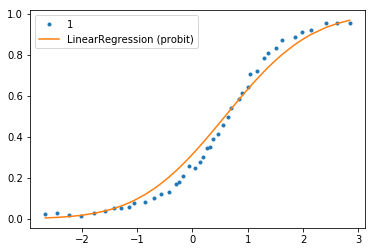

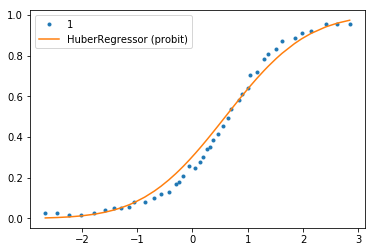

In [14]:
#fit

model1.fit(xs_input, ys_probit)
model2.fit(xs_input, ys_probit)

pred1 = probit_inv(model1.predict(xs_input))
pred2 = probit_inv(model2.predict(xs_input))

# visualize

plt.figure()
plt.plot(xs, ys, '.')
plt.plot(xs, pred1, label="LinearRegression (probit)")
plt.legend()

plt.figure()
plt.plot(xs, ys, '.')
plt.plot(xs, pred2, label="HuberRegressor (probit)")
plt.legend()

Probit is not the same thing as curve fit. Also, as it assumes a standard normal, it eems like a bad choice for this model.

(I haven't looked into this in deep, but just by the results above we can see the model is gonna get complicated).

Also, I was mostly worried of the trend of low probabilities being predicted higher. In this plot though, we see that the lowest probabilities are actually being predicted lower than they really are, so, this is a factor of the data or a result of using the logit transformation. We will use it as it is.

As for the mixed model, I must say it is a good idea to leave it behind. We have little time, and I don't know how well it will work on multiple dimensions. And it doesn't work best where we need it. And... Too complicated and experimental to result in anything good.

I'm running a test to see how the regression would behave in general if using probit instead of logit... Ok:

- MedAE got higher
- MSE got lower
- R2 score got higher

This means that our models tarted fitting outliers better and fitting middle range worse. So, it got less robust and logitstic regression is still the best option.

For not bringing anything new to the model, and bringing problems and a possible harder time to understand, I will leave the probit from now on.

Bye, bye good friend!